In [3]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd

In [4]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import cmocean
import seaborn as sns

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [5]:
dataset = (r'/Users/chiaraciscato/Desktop/geomar/FOCI data/CO2flux_CDR_EU_coast_ssp126_1m.nc')
data = xr.open_dataset(dataset)

In [6]:
lats = data.variables['nav_lat'][:]
lons = data.variables['nav_lon'][:]
time = data.variables['time_counter'][:]
co2flux = data.variables['co2flux_cpl'][:]

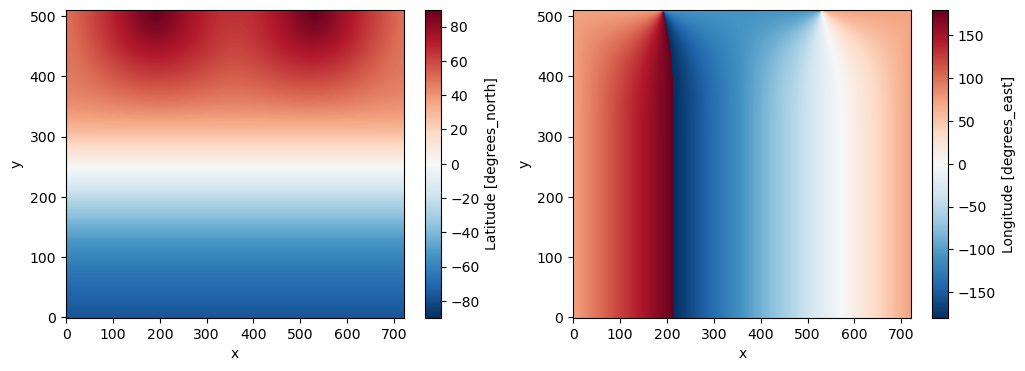

In [6]:
# plot coordinates

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
data.nav_lat.plot(ax=ax1)
data.nav_lon.plot(ax=ax2)

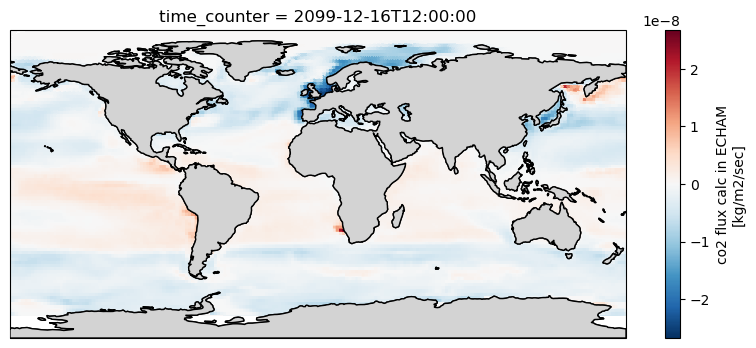

In [6]:
plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

data.co2flux_cpl[1019].plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", add_colorbar=True
)
ax.coastlines()
ax.set_global()

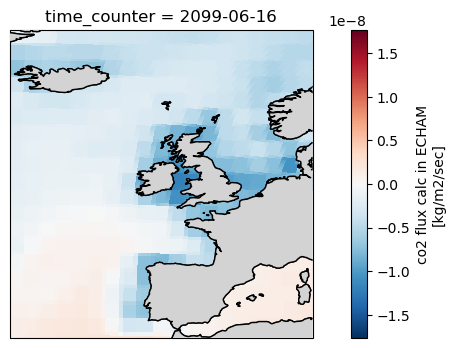

In [7]:
# visualise the data with cartopy

plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

data.co2flux_cpl[1013].plot.pcolormesh( # [] to select a month
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", 
    add_colorbar=True
)
ax.coastlines()
ax.set_extent([-25, 10, 35, 70]) # plot a region

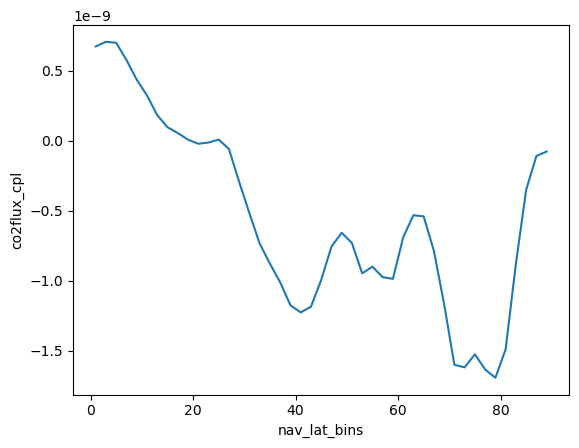

In [13]:
# calculate the mean CO2 flux at each latitude

lat_bins = np.arange(0, 91, 2) # define two-degree wide latitude bins

lat_center = np.arange(1, 90, 2) # define a label for each bin corresponding to the central latitude

CO2flux_mean = data.co2flux_cpl.groupby_bins("nav_lat", lat_bins, labels=lat_center).mean(
    dim=xr.ALL_DIMS
) # group according to those bins and take the mean

CO2flux_mean.plot()

# https://docs.xarray.dev/en/stable/examples/multidimensional-coords.html 

In [ ]:
# calculate the mean CO2 flux at each longitude

lon_bins = np.arange(-181, 181, 2) # define two-degree wide latitude bins

lon_center = np.arange(-180, 180, 2) # define a label for each bin corresponding to the central latitude

CO2flux_mean = data.co2flux_cpl.groupby_bins("nav_lon", lon_bins, labels=lon_center).mean(
    dim=xr.ALL_DIMS
) # group according to those bins and take the mean

CO2flux_mean.plot()

# https://docs.xarray.dev/en/stable/examples/multidimensional-coords.html 

In [8]:
ds_date_range = data.sel(time_counter=slice('2090', '2100')) # select a time range

In [9]:
df_range = ds_date_range.to_dataframe() # export data as Pandas dataframe 

In [10]:
df_range.describe() # describe the data 

,co2flux_cpl,nav_lat,nav_lon
count,8.854608e+07,8.854608e+07,8.854608e+07
mean,-4.203492e-10,5.172923e-01,-1.020404e+00
std,2.467771e-09,5.207631e+01,1.025694e+02
min,-5.436534e-08,-7.701048e+01,-1.799970e+02
25%,-1.196175e-09,-5.194667e+01,-9.518312e+01
50%,0.000000e+00,2.998630e+00,2.482575e+00
75%,2.412842e-10,5.047917e+01,8.425000e+01
max,5.325037e-08,8.988536e+01,1.799988e+02


In [14]:
ds_date_range.co2flux_cpl.mean(dim=('y', 'x')) # time_counter as x months for the selected timeframe

<xarray.DataArray 'co2flux_cpl' (time_counter: 120)>
array([-1.20204023e-09, -1.05842319e-09, -9.49695983e-10, -6.16181521e-10,
       -3.99297866e-10, -5.59252340e-11,  1.74169097e-10,  4.03052474e-10,
        4.08555372e-10, -5.81264085e-12, -7.19639676e-10, -1.18411759e-09,
       -1.21201314e-09, -1.11981546e-09, -9.78410335e-10, -5.80077699e-10,
       -3.95247300e-10, -7.44401873e-11,  2.22772106e-10,  3.30723708e-10,
        1.90318092e-10, -1.23392516e-10, -7.63268681e-10, -1.24466258e-09,
       -1.20030516e-09, -1.23543133e-09, -1.01676987e-09, -7.03768014e-10,
       -4.66176170e-10, -2.04565260e-10,  1.81097704e-10,  3.08395012e-10,
        4.41167884e-10,  6.81324831e-11, -6.73294972e-10, -1.09554990e-09,
       -1.18811192e-09, -1.18381193e-09, -9.20807096e-10, -7.07030145e-10,
       -3.41613041e-10, -2.18811464e-11,  3.38968225e-10,  4.81657353e-10,
        4.24340991e-10, -8.24153441e-12, -7.29447588e-10, -1.18499395e-09,
       -1.17472303e-09, -1.07197523e-09, -8.98258969e-10, -5.86253975e-10,
       -3.60163435e-10,  2.98768456e-11,  3.12249412e-10,  3.57298302e-10,
        3.07020978e-10,  4.43752109e-11, -5.61135602e-10, -1.08877559e-09,
       -1.09112439e-09, -1.00527594e-09, -7.93776782e-10, -5.26296817e-10,
       -2.60816757e-10, -8.65656900e-11,  3.15805385e-10,  4.92831287e-10,
        4.65244558e-10,  1.24341749e-11, -6.71159108e-10, -1.09427302e-09,
       -1.11231115e-09, -1.03918605e-09, -8.20049298e-10, -6.02982131e-10,
       -3.10246216e-10, -2.12211673e-11,  2.57231716e-10,  4.04928121e-10,
        4.35866934e-10, -3.28122391e-11, -6.99730249e-10, -1.11524755e-09,
       -1.14369411e-09, -1.06362148e-09, -8.51742702e-10, -5.77673779e-10,
       -3.77745869e-10, -9.13535473e-11,  8.86277797e-11,  3.34783412e-10,
        2.86896154e-10, -4.15156236e-11, -7.96246624e-10, -1.05542988e-09,
       -1.17280686e-09, -1.05917580e-09, -8.65148686e-10, -6.21500827e-10,
       -4.19510803e-10, -1.03072579e-10,  2.68099024e-10,  4.45771438e-10,
        3.96712881e-10, -2.68945147e-11, -6.94672755e-10, -1.14210669e-09,
       -1.11303895e-09, -1.10724202e-09, -9.26811088e-10, -6.42413977e-10,
       -3.99275492e-10, -9.61220200e-11,  2.13647489e-10,  4.39111575e-10,
        3.20759447e-10,  1.46674304e-11, -6.35984111e-10, -1.04606858e-09])
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2090-01-16T12:00:00 ... 2099-...

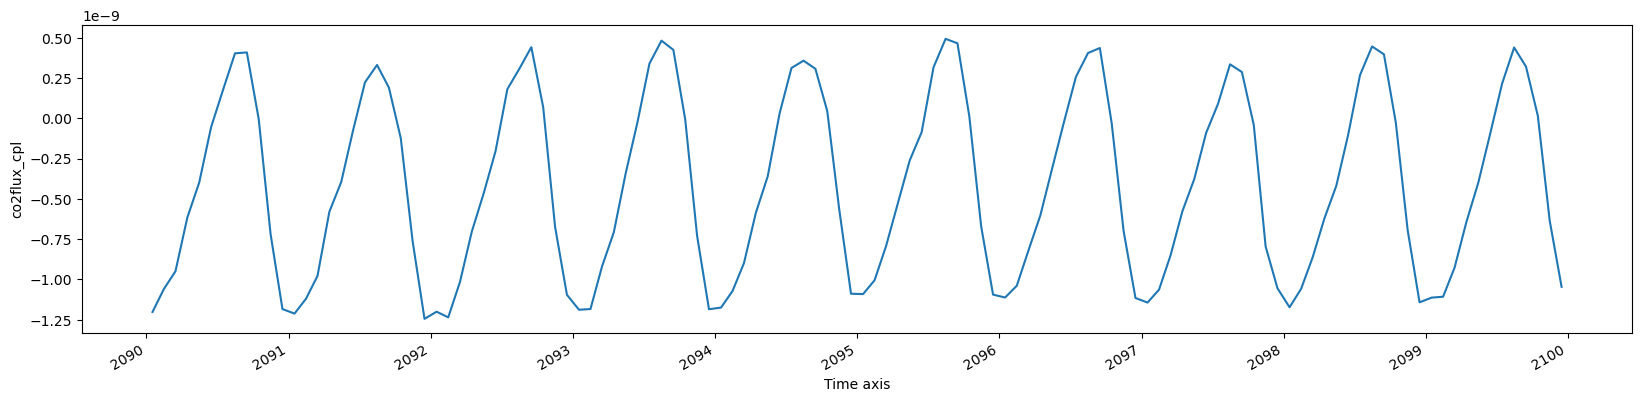

In [11]:
ds_date_range.co2flux_cpl.mean(dim=('y', 'x')).plot(figsize= (20, 4)) # global mean 

In [12]:
mean_array = ds_date_range.mean(dim='time_counter') # mean time
mean_array.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:      (y: 511, x: 722)
Coordinates:
    nav_lat      (y, x) float32 -77.01 -77.01 -77.01 -77.01 ... 50.07 50.0 50.0
    nav_lon      (y, x) float32 72.75 73.25 73.75 74.25 ... 73.01 73.0 73.0
Dimensions without coordinates: y, x
Data variables:
    co2flux_cpl  (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0>

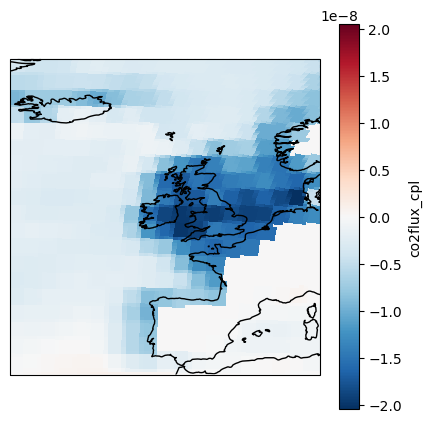

In [13]:
fig=plt.figure(figsize=(5,5), frameon=True) 

ax = plt.axes(projection=ccrs.PlateCarree())
mean_array.co2flux_cpl.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", add_colorbar=True
)

ax.coastlines(); 
ax.set_extent([-25, 10, 35, 70])

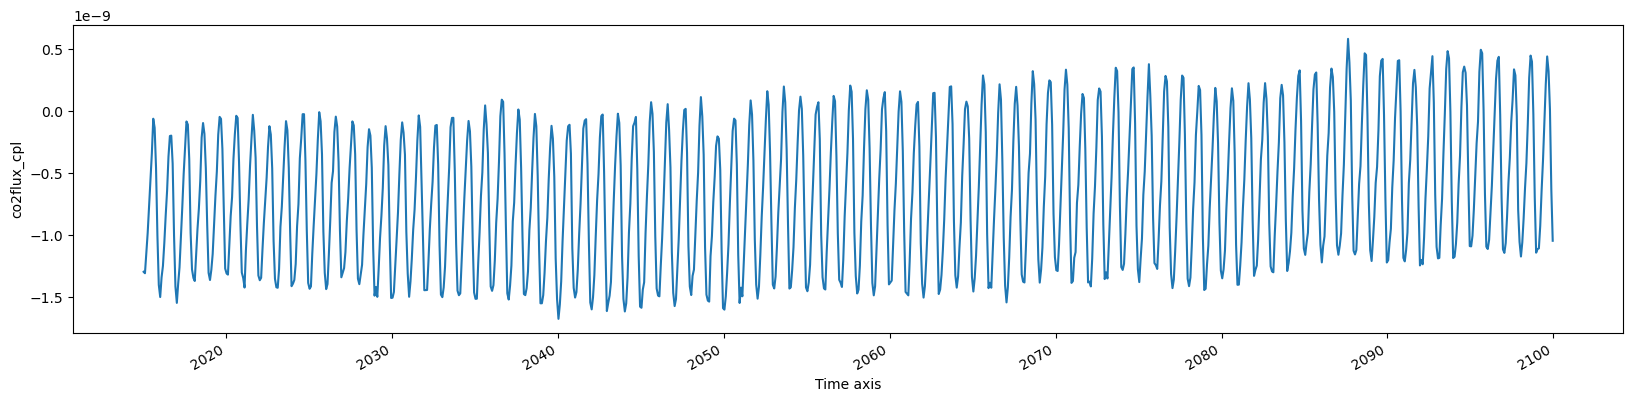

In [14]:
data.co2flux_cpl.mean(dim=('y', 'x')).plot(figsize= (20, 4)) # global mean

In [7]:
sliced_data = data.where((-25 < data.nav_lon) & (data.nav_lon < 10) & (35 < data.nav_lat) & (data.nav_lat < 70), drop=True)

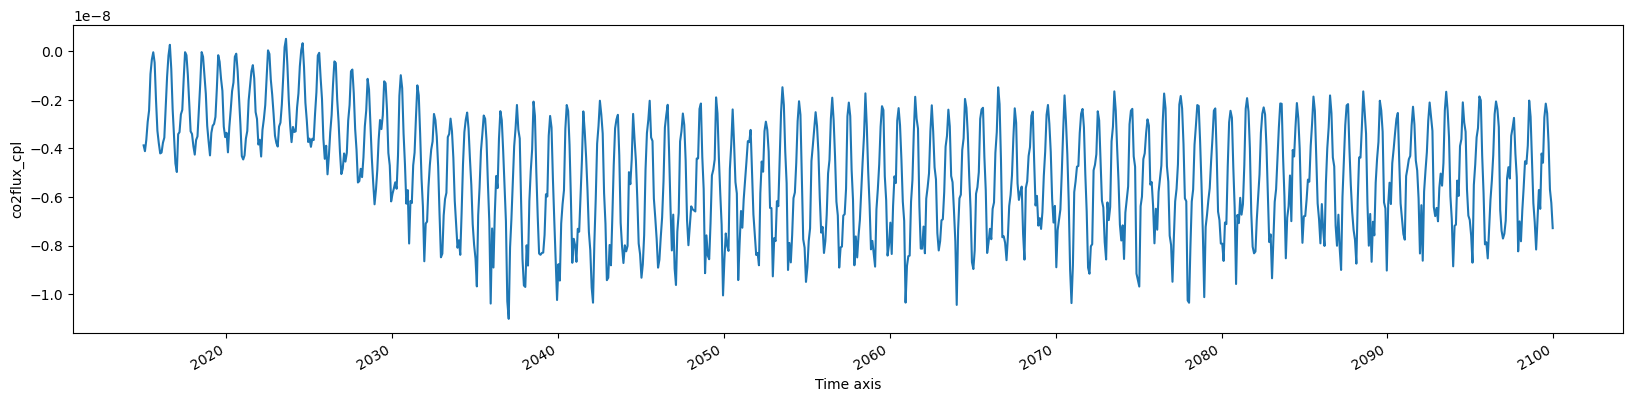

In [10]:
sliced_data.co2flux_cpl.mean(dim=('y', 'x')).plot(figsize= (20, 4)) # regional mean

In [37]:
df_sliced = sliced_data.to_dataframe() 

Text(0.5, 1.02, 'CO2 flux')

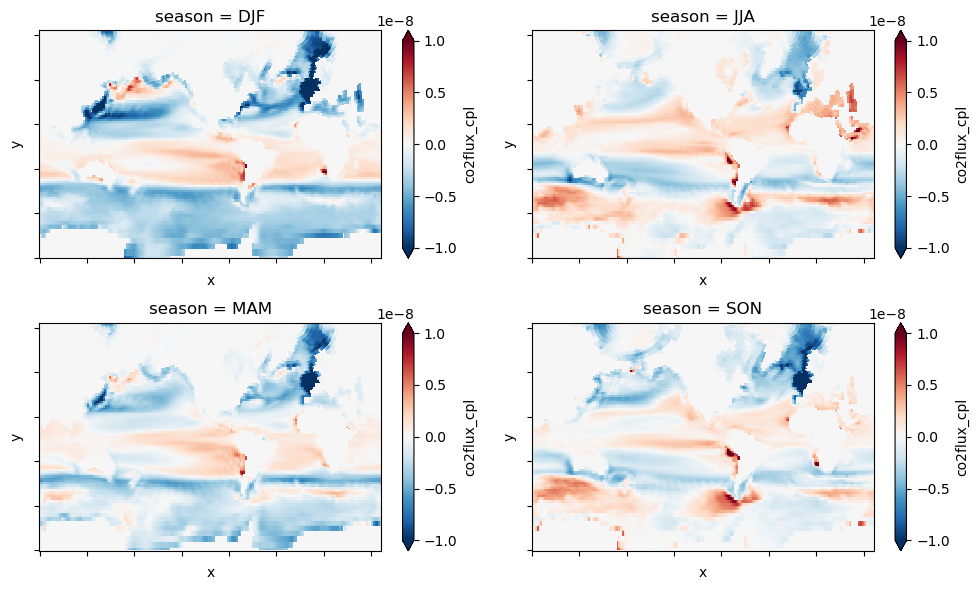

In [17]:
# global mean from 2015 to 2100

ds_season = data.co2flux_cpl.groupby('time_counter.season').mean('time_counter')
fig_world, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
i = 0
for j, season in enumerate(('DJF', 'MAM', 'JJA', 'SON')):
    if season =='JJA':
        i += 1
        j = 0
        
    elif season =='SON':
        j = 1
        
    ds_season.sel(season=season).plot.pcolormesh(
        ax=axes[j, i], vmin=-0.00000001, vmax=0.00000001, cmap='RdBu_r',
        add_colorbar=True, extend='both')
    
for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis('tight')

plt.tight_layout()
fig.suptitle('CO2 flux', fontsize=16, y=1.02)

Text(0.5, 1.02, 'CO2 seasonal flux')

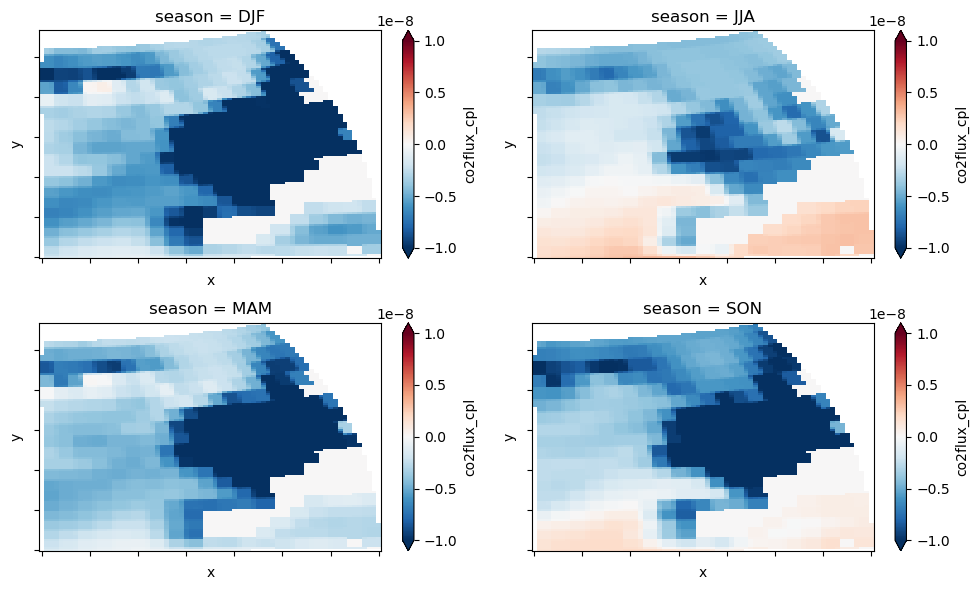

In [18]:
# regional mean from 2015 to 2100

ds_season = sliced_data.co2flux_cpl.groupby('time_counter.season').mean('time_counter')
fig_region, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
i = 0
for j, season in enumerate(('DJF', 'MAM', 'JJA', 'SON')):
    if season =='JJA':
        i += 1
        j = 0
        
    elif season =='SON':
        j = 1
        
    ds_season.sel(season=season).plot.pcolormesh(
        ax=axes[j, i], vmin=-0.00000001, vmax=0.00000001, cmap='RdBu_r',
        add_colorbar=True, extend='both')
    
for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis('tight')

plt.tight_layout()
fig.suptitle('CO2 seasonal flux', fontsize=16, y=1.02)

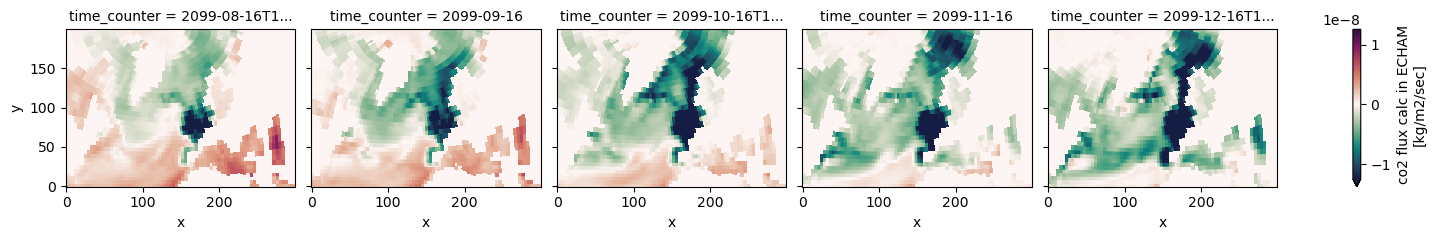

In [19]:
# last seven days of the simulation

ds = '/Users/chiaraciscato/Desktop/geomar/FOCI data/CO2flux_CDR_EU_coast_ssp126_1m.nc'

cmap = cmocean.cm.curl
with xr.open_dataset(ds) as xadf:
    pd = xadf.isel(time_counter=slice(-5,None), y=slice(300, 500), x=slice(400, 700)) #last seven days
    facet = pd['co2flux_cpl'].plot(x='x', y='y', col='time_counter',col_wrap=5,robust=True,figsize=(16,2.5),cmap=cmap)

In [8]:
# slice timeframe

start_date = "2090-01-01"
end_date = "2100-01-01"

co2_flux = sliced_data["co2flux_cpl"].sel(time_counter=slice(start_date, end_date))

In [9]:
co2flux_season_summary = co2_flux.groupby('time_counter.season').mean('time_counter', skipna=True)

In [10]:
co2flux_season_mean_all_years = co2_flux.resample(time_counter='QS-DEC', keep_attrs=True).mean()

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"


In [11]:
co2flux_seasonal_mean = co2flux_season_mean_all_years.groupby('time_counter').mean(["y", "x"])

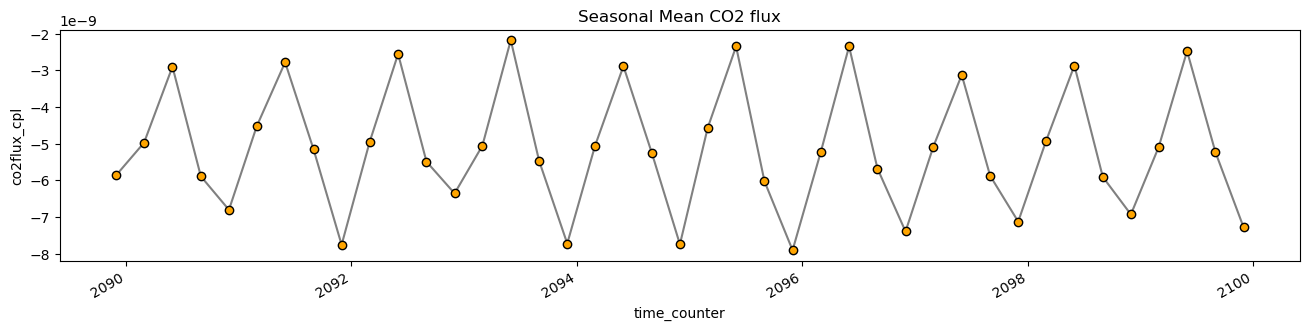

In [13]:
f, ax = plt.subplots(figsize=(16, 3))
co2flux_seasonal_mean.plot(marker="o",
                        color="grey",
                        markerfacecolor="orange",
                        markeredgecolor="black")
ax.set(title="Seasonal Mean CO2 flux")
plt.show()

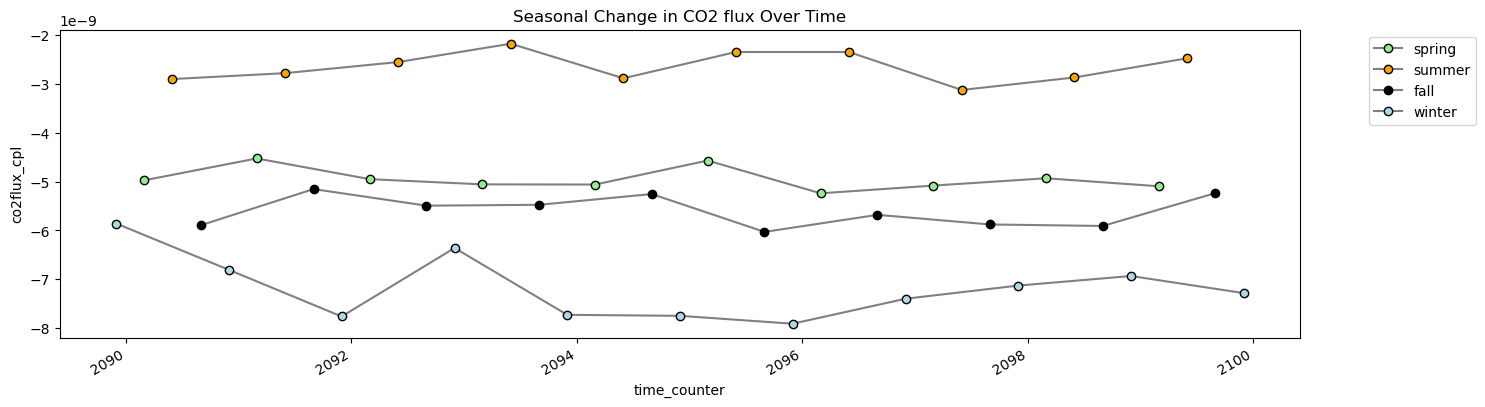

In [14]:
colors = {3: "lightgreen", 6: "orange", 9: "black", 12: "lightblue"}
seasons = {3: "spring", 6: "summer", 9: "fall", 12: "winter"}

f, ax = plt.subplots(figsize=(16, 4))
for month, arr in co2flux_seasonal_mean.groupby('time_counter.month'):
    arr.plot(ax=ax,
             color="grey",
             marker="o",
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set(title="Seasonal Change in CO2 flux Over Time")
plt.show()

sliced_frame = sliced_data.sel(time_counter=slice('2090', '2100'))

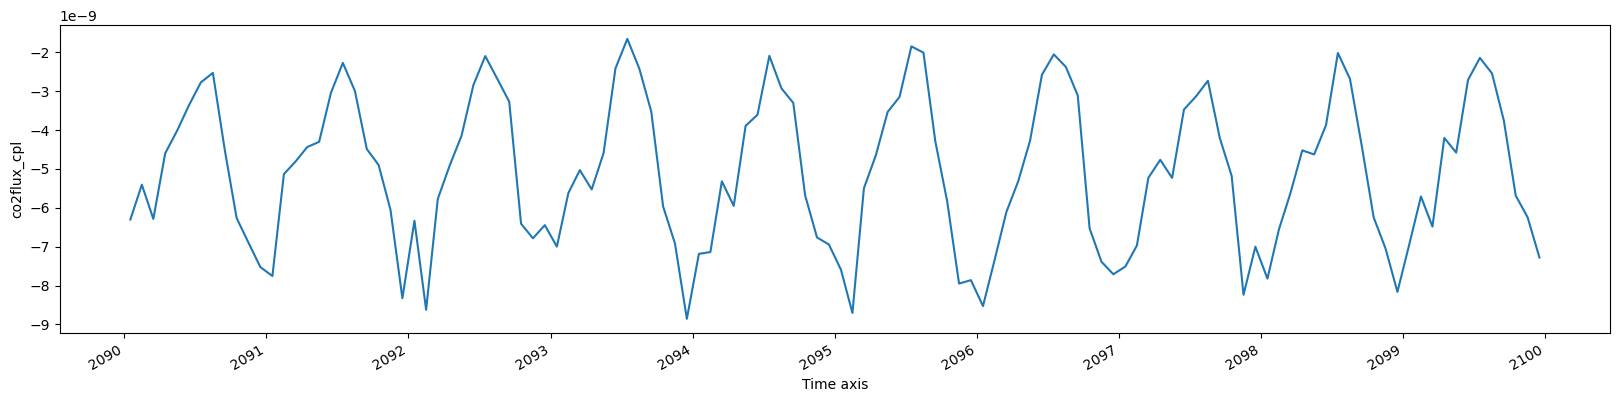

In [13]:
sliced_frame.co2flux_cpl.mean(dim=('y', 'x')).plot(figsize= (20, 4)) # global mean

Text(0.5, 1.02, 'CO2 seasonal flux')

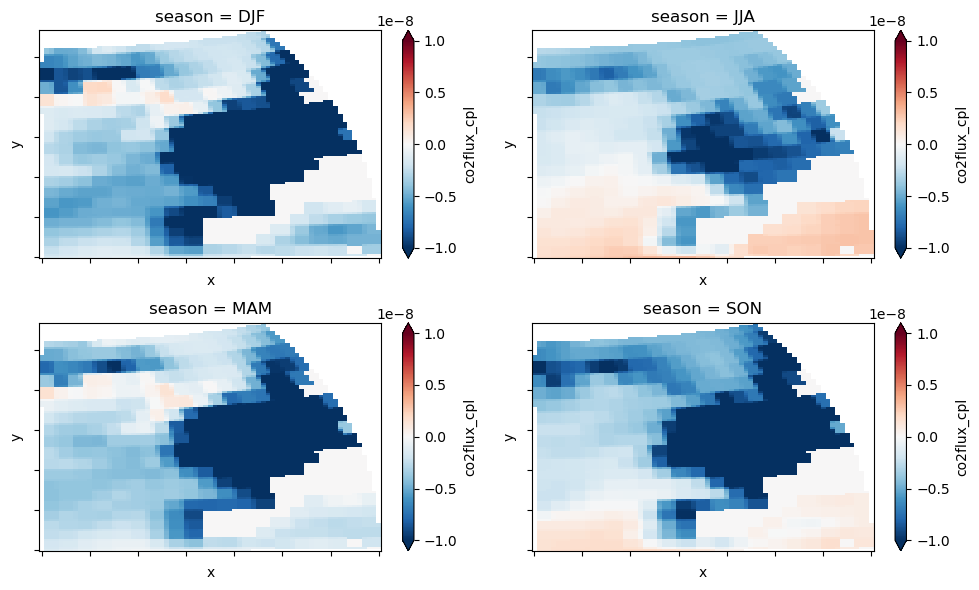

In [29]:
ds_season = sliced_frame.co2flux_cpl.groupby('time_counter.season').mean('time_counter')
fig_region, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
i = 0
for j, season in enumerate(('DJF', 'MAM', 'JJA', 'SON')):
    if season =='JJA':
        i += 1
        j = 0
        
    elif season =='SON':
        j = 1
        
    ds_season.sel(season=season).plot.pcolormesh(
        ax=axes[j, i], vmin=-0.00000001, vmax=0.00000001, cmap='RdBu_r',
        add_colorbar=True, extend='both')
    
for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis('tight')

plt.tight_layout()
fig.suptitle('CO2 seasonal flux', fontsize=16, y=1.02)

In [14]:
df_oae = sliced_frame.to_dataframe()

In [15]:
df_oae_overview = df_oae.describe()

In [16]:
df_oae_overview.to_excel('co2flux_oae_2090_2100_eu.xlsx')